In [88]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/train.csv')
print(df.head())

          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731

In [4]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [89]:
from math import asin, cos, sin, sqrt, pi

# haversine formula
def hav(degree):
    return (sin(degree/2)) ** 2

# convert from degree to radians
def deg2rad(degree):
    return degree * pi / 180

# Calculate the distance between pickup and dropoff points
def distance(long1, lat1, long2, lat2):
    r = 6371 # Earth radius is 6371 km
    temp = hav(deg2rad(lat2 - lat1)) + cos(deg2rad(lat1)) * cos(deg2rad(lat2)) * hav(deg2rad(long2 - long1))
    return 2 * r * asin(sqrt(temp))

def flight_distance(row):
    return distance(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude'])

trip = df.loc[0]
print("Distance: {} km".format(flight_distance(trip)))

Distance: 1.4985207796462985 km


In [90]:
df['flight_distance'] = df.apply(lambda row: flight_distance(row), axis=1)

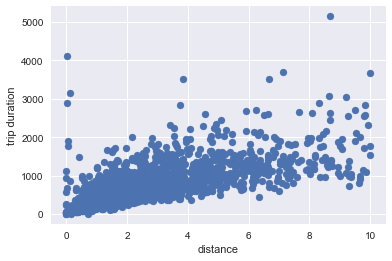

In [91]:
# remove outliers
new_df = new_df[new_df['trip_duration'] < 20000]
new_df = new_df[new_df['flight_distance'] < 10]

%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(new_df['flight_distance'], new_df['trip_duration'])
plt.xlabel('distance')
plt.ylabel('trip duration')
plt.show()

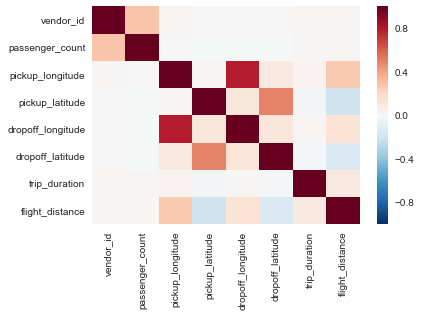

In [92]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [96]:
def seconds_from_midnight(time):
    return time.hour * 3600 + time.minute * 60 + time.second

from datetime import datetime
now = datetime.now()
df['pickup_date'] = df.apply(lambda row: (datetime.now() - pd.to_datetime(row['pickup_datetime'])).days, axis=1)
df['pickup_time'] = df.apply(lambda row: seconds_from_midnight(pd.to_datetime(row['pickup_datetime'])), axis=1)
print(df.head())
print(df.info())

          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  flight_distance  \
0         40.765602                  N            455 

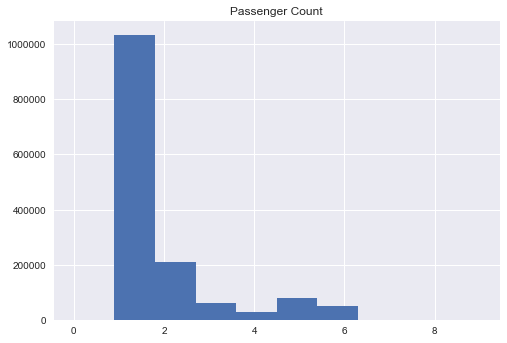

In [80]:
plt.hist(df['passenger_count'])
plt.title('Passenger Count')
plt.show()

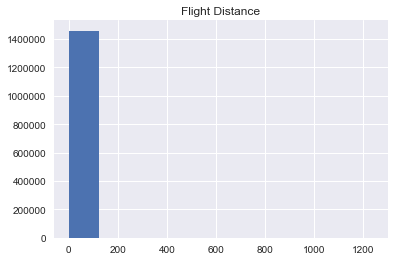

In [122]:
plt.hist(df['flight_distance'])
plt.title('Flight Distance')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x18c313128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x148ae5b00>]], dtype=object)

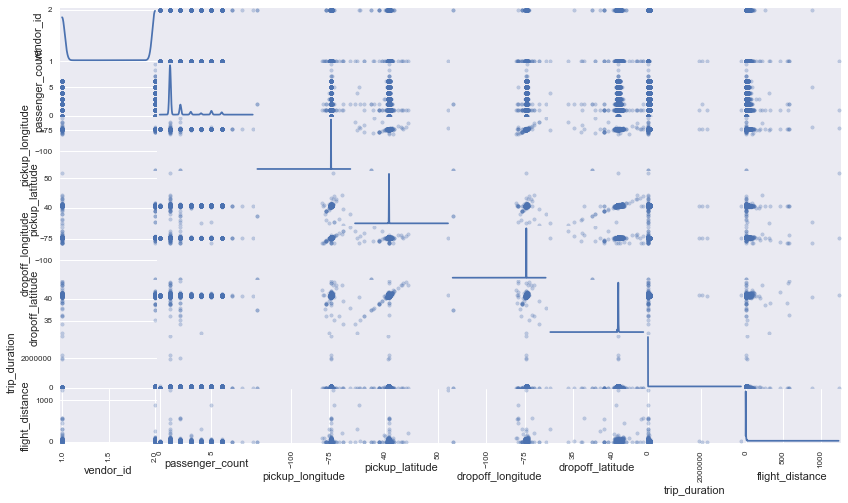

In [95]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

In [135]:
def remove_outliers(df, column_name):
    Q1 = np.percentile(df[column_name], 25)
    Q3 = np.percentile(df[column_name], 75)
    step = 3 * (Q3 - Q1)
    print("Q1: {}\nQ3: {}".format(Q1, Q3))
    print("number of outliers: {}".format(len(df[(df[column_name] - Q3 > step) | (df[column_name] - Q1 < -step)])))
    return df[(df[column_name] - Q3 <= step) & (df[column_name] - Q1 >= -step)]

good_data = remove_outliers(df, 'flight_distance')
good_data = remove_outliers(good_data, 'pickup_longitude')
good_data = remove_outliers(good_data, 'pickup_latitude')
good_data = remove_outliers(good_data, 'dropoff_longitude')
good_data = remove_outliers(good_data, 'dropoff_latitude')

Q1: 1.2318365662076314
Q3: 3.875337418231616
number of outliers: 65447
Q1: -73.9920654296875
Q3: -73.96857452392578
number of outliers: 38910
Q1: 40.738468170166016
Q3: 40.767486572265625
number of outliers: 1197
Q1: -73.99156188964845
Q3: -73.96517944335938
number of outliers: 19551
Q1: 40.7374382019043
Q3: 40.76955032348633
number of outliers: 1888


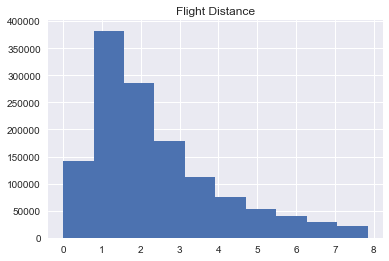

In [121]:
plt.hist(good_data['flight_distance'])
plt.title('Flight Distance')
plt.show()

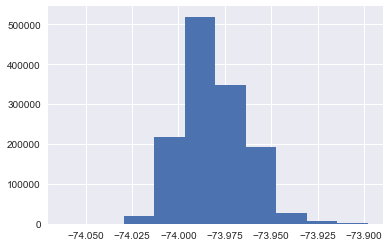

0
0


In [136]:
plt.hist(good_data['pickup_longitude'])
plt.show()

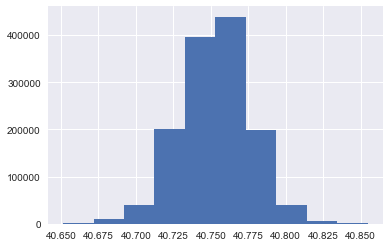

In [137]:
plt.hist(good_data['pickup_latitude'])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x143ee31d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1323f9198>]], dtype=object)

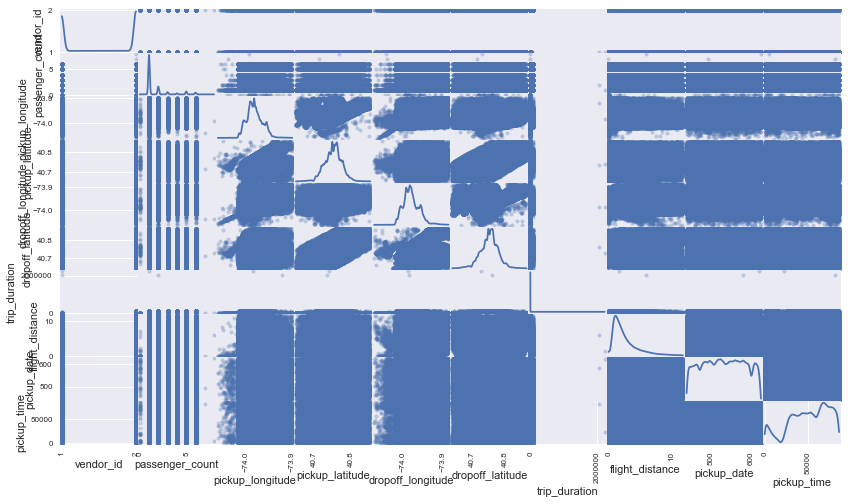

In [138]:
scatter_matrix(good_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

In [149]:
from sklearn.cross_validation import train_test_split
duration = good_data['trip_duration']
features_final = good_data.drop(['trip_duration', 'vendor_id', 'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime', 'id'], axis=1)
print(features_final.head())
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    duration, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude  flight_distance  pickup_date  pickup_time  
0         40.765602         1.498521          550        62695  
1         40.731152         1.805507          461         2615  
2         40.710087         6.385098          605        41724  
3         40.706718         1.485498          527        70351  
4         40.782520         1.188588          538        48655  


In [148]:
def accuracy_score(actual, prediction):
    actual = np.array(actual)
    prediction = np.array(prediction)    
    return np.sqrt(np.mean(np.power(np.log(actual + 1) - np.log(prediction + 1), 2)))

In [167]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=22)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("with max_depth {}: {}".format(max_depth, accuracy_score(y_test, y_pred)))

with max_depth 9: 0.5334745197540391
Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'flight_distance',
       'pickup_date', 'pickup_time'],
      dtype='object')
[ 0.00928879  0.3150784   0.05797472  0.05928414  0.37072947  0.08863102
  0.03175484  0.06725862]


In [ ]:
print(features_final.columns)
print(reg.feature_importances_)

In [156]:
from sklearn.neighbors import KNeighborsRegressor

for n in range(10):
    reg = KNeighborsRegressor(n_neighbors=n + 3)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print(accuracy_score(y_test, y_pred))

0.764041097974
0.763752385131
0.766286989867
0.770692235157
0.774673227024
0.779112260205
0.78267410861
0.786385446725
0.79003567527
0.792852094762


In [160]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("Score: {}".format(accuracy_score(y_test, y_pred)))

Score: 0.6148691925354011


In [166]:
print(features_final.columns)

Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'flight_distance',
       'pickup_date', 'pickup_time'],
      dtype='object')


In [176]:
features_normalized = features_final
features_normalized['passenger_count'].values.reshape(-1,1)
features_normalized['pickup_longitude'].values.reshape(-1,1)
features_normalized['pickup_latitude'].values.reshape(-1,1)
features_normalized['dropoff_longitude'].values.reshape(-1,1)
features_normalized['dropoff_latitude'].values.reshape(-1,1)
features_normalized['flight_distance'].values.reshape(-1,1)
features_normalized['pickup_date'].values.reshape(-1,1)
features_normalized['pickup_time'].values.reshape(-1,1)

print(features_normalized.head())

X_train, X_test, y_train, y_test = train_test_split(features_normalized, 
                                                    duration, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0            -0.75         -0.024980         0.147231           0.148173   
1            -0.75         -0.003768        -0.142009          -0.229535   
2            -0.75          0.013165         0.107864          -0.292955   
3            -0.75         -0.365028        -0.325094          -0.368116   
4            -0.75          0.086012         0.396090           0.058293   

   dropoff_latitude  flight_distance  pickup_date  pickup_time  
0          0.107736        -0.746134     0.186813     0.451290  
1         -0.198805        -0.694127    -0.791209    -0.939467  
2         -0.386239         0.081705     0.791209    -0.034155  
3         -0.416211        -0.748340    -0.065934     0.628514  
4          0.258274        -0.798640     0.054945     0.126286  


In [178]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("Score: {}".format(accuracy_score(y_test, y_pred)))


Score: 0.6148691925354102


In [179]:
from sklearn.tree import DecisionTreeRegressor
max_depth = 22
reg = DecisionTreeRegressor(max_depth=max_depth)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("with max_depth {}: {}".format(max_depth, accuracy_score(y_test, y_pred)))

with max_depth 22: 0.5310014556297772


In [182]:
for n in range(3):
    reg = KNeighborsRegressor(n_neighbors=n+1)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print(accuracy_score(y_test, y_pred))

0.595556228263
0.55546309728
0.54707178238
